## Introduction to mathematical optimization

Mathematical optimization is a branch of applied and computational mathematics that aims to find the ideal inputs for a specific problem. In agriculture, mathematical optimization maximizes crop yields by analyzing variables such as soil conditions and weather to have the best crop quantity and quality.


## Applying an objective function
You work for a media company and are faced with the problem of minimizing the cost to print and distribute magazines. You want to find the optimal number of magazines to publish and print for the smallest cost.

In your organization, the costs associated with a number of magazines printed is calculated using the following equation:
$C = 50 + 5*(q-2)**2$

The costs
 and quantity of magazines
 are in thousands, so the 50 represents $50,000, the fixed costs of your business, such as paying the rent on the building.

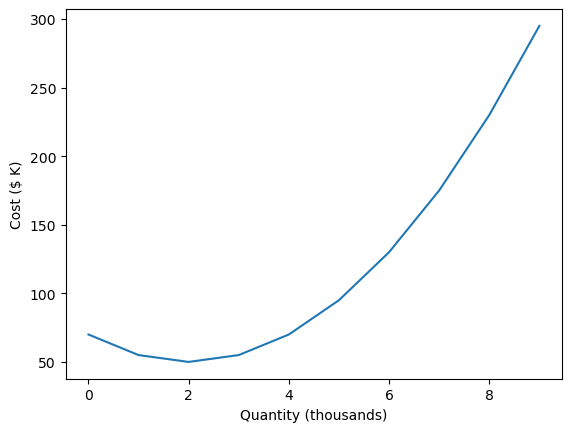

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Create an array of integers from 0 to 10
quantity = np.arange(10)

# Define the cost function
def cost(q):
  return 50 + 5*(q-2)**2

# Plot cost versus quantity
plt.plot(quantity, cost(quantity))
plt.xlabel('Quantity (thousands)')
plt.ylabel('Cost ($ K)')
plt.show()

## Exhaustive search method
You've applied the objective function and visualized the result; however, you could only eye-ball the optimal value by reviewing the plot. A more precise way of finding this value is with the exhaustive search method.

You're again working for a media company that publishes and prints magazines, but this time, you'll discover how to maximize profit rather than minimize cost. Recall that the profit and quantity units are in the thousands, so a q of 1 is 1000 magazines and a profit of 5 is $5000.

The same quantity array from the previous exercise has been provided for you, along with a profit() function to optimize.

In [2]:
# Calculate the profit for every quantity
def profit(q):
  return (10 * q - 25 - q**2) + 11

profits = profit(quantity)

# Find the maximum profit
max_profit = profits.max()

# Find the optimal quantity
max_profit_ind = np.argmax(profits)
optimal_quantity = quantity[max_profit_ind]

# Print the results
print(f"You need to print {optimal_quantity * 1000} magazines to make the maximum profit of ${max_profit * 1000}.")

You need to print 5000 magazines to make the maximum profit of $11000.


## Finding the derivative
For some objective functions, the optimum can be found using calculus by finding the derivative of the function. sympy offers a solution to avoid manually calculating these derivatives. Suppose you work in a firm that produces toy bicycles. You have the following objective function to calculate your costs, C, which is dependent on the variable, q, the quantity of bicycles produced:
$C=2000-q^2+120q$

To find the optimum value of
, you'll find the derivative of the cost with respect to the quantity, dC/dq, using sympy.

In [10]:
from sympy import symbols, diff, solve

# Convert q into a symbol
q = symbols('q')
c = 2000 - q**2 + 120 * q

# Find the derivative of the objective function
dc_dq = diff(c, q)
print(f"The derivative is {dc_dq}.")

# Solve the derivative
q_opt = solve(dc_dq)
print(f"Optimum quantity: {q_opt}")

The derivative is 120 - 2*q.
Optimum quantity: [60]


In [11]:
d2c_dq2 = diff(dc_dq, q)
print(f"The second derivative is {d2c_dq2}.")   

The second derivative is -2.


To summarize, first derivatives help find critical points in optimization problems. Second derivatives help identify if these points are minima or maxima (2nd deriv. > 0 : minima, < 0 : maxima)

## Multivariate optimization

Partial derivatives with SymPy

You are an economist working for an automotive company. Your manager has modeled the production process as a function of the number of machines k
 and the number of workers L to produce $F=-3k^2+100k-1/2L^2+100L$ cars. 
 
 This is your multivariate objective function. You'll need to use partial derivatives to optimize this function.

In [12]:
# Define symbols K, L
K, L = symbols('K L')

F = -3*K**2 + 100* K - (1/2)*L**2 + 100*L

# Derive the partial derivatives
dF_dK = diff(F, K)
dF_dL = diff(F, L)
	
# Solve the equations
crit_points = solve((dF_dK, dF_dL))

print(crit_points)

{K: 16.6666666666667, L: 100.000000000000}


## Unconstrained optimization


Finding the maxima

Unconstrained optimization is finding the maxima or minima of a function that does not have any constraints or restrictions on the input variables.

Suppose you are launching a new product in your delicious cookie company and you want to maximize the revenue. The revenue can be modeled with this objective function where R is the revenue generated at price x.

$R = -(x^2) + 3x - 5$

Solve this maximization problem using SciPys minimize_scalar() which has been loaded for you.

In [27]:
from scipy.optimize import minimize_scalar, Bounds, LinearConstraint
# Define the new objective function
def negated_function(x):
  return -1*(-(x**2)+3*x-5)

# Maximize the negated function
result = minimize_scalar(negated_function)

# Print the result
print(f"The maximum is {result.x:.2f} in two decimals")

The maximum is 1.50 in two decimals


Great job maximizing that revenue! You now want to look at minimizing costs.

You'll need to consider two variables for your new cookie product, the sugar ingredient (a[0]) and the flour ingredient (a[1]). This is a multivariate optimization problem where you want to find the best way to mix these ingredients so that your cookies are delicious but not too expensive!

In [18]:
from scipy.optimize import minimize
def objective_function(a):
  return (a[0] - 2)**2 + (a[1] - 3)**2 + 3 

# Save your initial guess
x0 = [1, 2]

# Calculate and print the minimum
result = minimize(objective_function, x0)
print(f"minimum is (x, y) = ({result.x[0]:.2f}, {result.x[1]:.2f}) in two decimals.")

minimum is (x, y) = (2.00, 3.00) in two decimals.


## Bound-constrained optimization


Working with Bounds
Bound-constrained problems have variables that are limited to a range of values.

You're running a coffee shop and need to place an order for two varieties of coffee beans: b[0] and b[1]. You want to minimize costs. Your supplier only accepts minimum quantity orders of 2 units for each bean, and you can afford a maximum of 100 units per bean.

In [19]:
def objective_function(b):
  return (b[0] - 6)**2 + (b[1] - 8)**2 + 3

# Set the bounds of your problem
bounds = [[2, 100], [2, 100]]

x0 = [10, 5]

# Find the minimum
result = minimize(objective_function, x0, bounds=bounds)

print(result.x)

[6.         7.99999999]


Handling hard inequalities

Back in the coffee shop, you want to look at minimizing daily expenses. You have an objective function that calculates your production costs, and a constraint function that tells you the limits of how much coffee you can produce.

Apply scipy to find the optimal allocation of resources to minimize costs.

In [20]:
def objective_function(b):
  return (b[0] - 5) ** 2 + (b[1] - 3) ** 3

def constraint_function(x):
    return 2*x[0] + 3*x[1] - 6

# Set the constraint variable
constraint = {'type':'ineq',
              'fun': constraint_function}

x0 = [20, 20]

# Find the minimum
result = minimize(objective_function, x0, constraints=[constraint])

print(result)

 message: Inequality constraints incompatible
 success: False
  status: 4
     fun: -5596424370440672.0
       x: [ 2.665e+05 -1.775e+05]
     nit: 3
     jac: [ 0.000e+00  9.456e+10]
    nfev: 9
    njev: 3


### Linear programming


In [21]:
!pip install pulp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 8.5 MB/s eta 0:00:0000:0100:01m


PuLP for linear optimization

A farmer faces a diet problem for their cattle. The vet's recommendation is that each animal is fed at least 7 pounds of a mix of corn and soybean with at least 17% protein and 2% fat. Below are the relevant nutritional elements:

Food type	Cost ($/lb)	Protein (%)	Fat (%)

corn	     0.11	         10	           2.5

soybean	      0.28	         40	           1

You will use this information to minimize costs subject to nutritional constraints.

In [22]:
from pulp import *
# Define the model
model = LpProblem("MinCost", LpMinimize) 

# Define the variables
C = LpVariable("C", lowBound=0)
S = LpVariable("S", lowBound=0) 

# Add the objective function and constraints
model += 0.11*C + 0.28*S 
model += 40*S + 10*C >= 17*(C+S), "M_protein"
model += S + 2.5*C >= 2*(C+S), "M_fat"
model += C + S >= 7, "M_weight"

# Solve the model
status=model.solve()
print(f"Cost = {value(model.objective):.2f}")
print(f"Pounds of soybean = {S.varValue:.2f}, pounds of corn = {C.varValue:.2f}") 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/emadchelhi/miniconda3/envs/1.0/lib/python3.12/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/1x/nt297b5d1n771twhnkz_vs_80000gn/T/9ddf6702d84f44098a236fde2562cc89-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /var/folders/1x/nt297b5d1n771twhnkz_vs_80000gn/T/9ddf6702d84f44098a236fde2562cc89-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 8 COLUMNS
At line 17 RHS
At line 21 BOUNDS
At line 22 ENDATA
Problem MODEL has 3 rows, 2 columns and 6 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 3 (0) rows, 2 (0) columns and 6 (0) elements
0  Obj 0 Primal inf 6.9999999 (1)
2  Obj 1.0476667
Optimal - objective value 1.0476667
Optimal objective 1.047666667 - 2 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seco

#### Handling multiple variables and constraints

In [23]:
model = LpProblem("MinCost", LpMinimize) 

# Adjust the variable definition
variables = LpVariable.dicts('Food', ['C', 'S'], lowBound=0)

# Adjust the objective function
cost = {'C': 0.11, 'S': 0.28}
model += lpSum([cost[i] * variables[i] for i in ['C', 'S']])

model += 40*variables['S'] + 10*variables['C'] >= 17*(variables['C']+variables['S']), "M_protein"
model += variables['S'] + 2.5*variables['C'] >= 2*(variables['C']+variables['S']), "M_fat"
model += variables['C'] + variables['S'] >= 7, "M_weight"

model.solve()
print(f"Cost = {value(model.objective):.2f}")
print(f"Pounds of soybean = {variables['S'].varValue:.2f}, pounds of corn = {variables['C'].varValue:.2f}") 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/emadchelhi/miniconda3/envs/1.0/lib/python3.12/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/1x/nt297b5d1n771twhnkz_vs_80000gn/T/c879c41f37814c1ca14032638fdcbbb8-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /var/folders/1x/nt297b5d1n771twhnkz_vs_80000gn/T/c879c41f37814c1ca14032638fdcbbb8-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 8 COLUMNS
At line 17 RHS
At line 21 BOUNDS
At line 22 ENDATA
Problem MODEL has 3 rows, 2 columns and 6 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 3 (0) rows, 2 (0) columns and 6 (0) elements
0  Obj 0 Primal inf 6.9999999 (1)
2  Obj 1.0476667
Optimal - objective value 1.0476667
Optimal objective 1.047666667 - 2 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seco

## Non-linear Constrained Optimization


Visualize the indifference curve

You have been provided the following utility function and constraint.

$U(c,m)=c^{0.7}+m^{0.3}$

$c+m=2$

Use this to visualize the indifference curve.

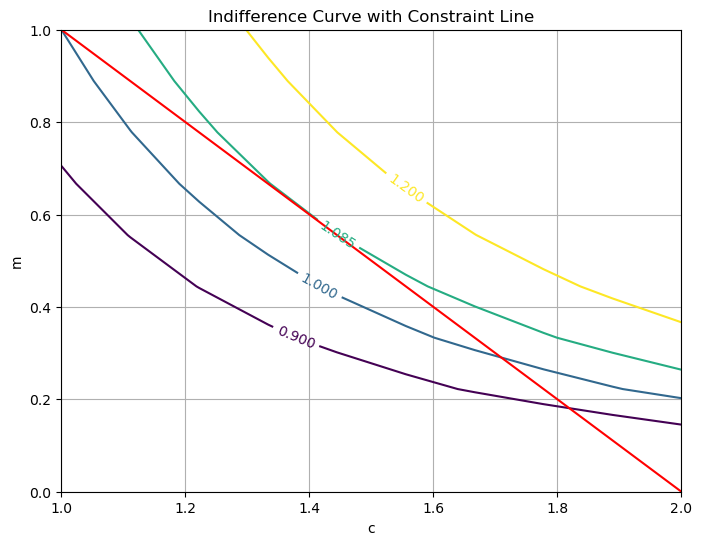

In [24]:
c = np.linspace(1, 2, 10)  
# Define the constraint and generate combinations
m = 2 - c 
C, M = np.meshgrid(c, m)
# Define the utility function
F = C**0.7 * M**0.3

plt.figure(figsize=(8, 6))
# Plot the controls and constraints
contours = plt.contour(C, M, F, levels=[0.9, 1.00, 1.085, 1.2])
plt.clabel(contours)
plt.plot(c, m, color='red')
plt.title('Indifference Curve with Constraint Line')
plt.xlabel('c')
plt.ylabel('m')
plt.grid(True)
plt.show()

#### Solving with sciPy
Bill is an aspiring piano student who allocates hours of study in classical 
 and modern 
 music. His preferences are represented by the same utility function you just plotted:

$U(c,m)=c^{0.7}+m^{0.3}$

Hours of study sum up to $2(c+m=2)$ daily. Help Bill find the optimal studying plan.

In [25]:
# Define the utility function
def utility_function(vars):
    c, m = vars
    return -(c**.7 * m**.3)

# Define the constraint function
def constraint(vars):
    return 2 - np.sum(vars)

initial_guess = [12, 12]  

# Set up the constraint
constraint_definition = {'type': 'eq', 'fun': constraint}

# Perform optimization
result = minimize(utility_function, initial_guess, constraints=constraint_definition)
c, m = result.x

print("Optimal study hours for classical music:", round(c, 2))
print("Optimal study hours for modern music:", round(m, 2))

Optimal study hours for classical music: 1.4
Optimal study hours for modern music: 0.6


Linear constrained biscuits

Congratulations! Your biscuit business has expanded. You now have two bakeries, A and B, to help you deliver your biscuits nationwide.

Your bakeries can each make 100 biscuits a day and the cost of making a biscuit in bakery A is 1.5 the quantity q while in bakery B it is 1.75 q.

Price is defined by 150-q.

Your business is booming and you already have 140 biscuit pre-orders for the day. You want to maximize your profit for the day. How many biscuits should you make in each bakery?

minimize, Bounds, and LinearConstraint have been loaded for you and the revenue function R is already defined.

In [28]:
def R(q):
    return (150 - q[0] - q[1]) * (q[0] + q[1])

# Define the cost function
def C(q): 
  return 1.5*q[0]+1.75*q[1]

# Define the profit function
def profit(q): 
  return R(q) - C(q)

# Define the bounds and constraints
bounds = Bounds([0,0], [100,100]) 
constraints = LinearConstraint([1, 1], lb=140) 

# Perform optimization
result = minimize(lambda q: -profit(q),                 
                  [50, 50],              
                  bounds=bounds,
                  constraints=constraints)

print(result.message)
print(f'The optimal number of biscuits to bake in bakery A is: {result.x[0]:.2f}')
print(f'The optimal number of biscuits to bake in bakery A is: {result.x[1]:.2f}')
print(f'The bakery company made: ${-result.fun:.2f}')

Optimization terminated successfully
The optimal number of biscuits to bake in bakery A is: 100.00
The optimal number of biscuits to bake in bakery A is: 40.00
The bakery company made: $1180.00


#### Non-linear Constraints in sciPy

Recall the constraint for the bakeries is they need to fulfill a minimum of 140 pre-orders and each factory can make 100 biscuits daily.